## 人脸识别
1. 人脸有不同的颜色组成
2. 不同的颜色由三原色：红绿蓝组成
3. 红绿蓝由0~255的数字组成

### 所以人脸是由数据组成的

### 使用matplotlib.pyplot导入数据图片并显示,观察这张图片的数据类型

GridSearchCV 查找最优的条件：参数

PCA降维，图片的数据比较大，维度 28*28 = 784
437*640 = 273280

## 进行人脸识别操作
1.导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、loggin等  


2.设置logging，控制台显示程序处理数据的进度  


3.使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地  


4.查看人脸数据结构  


5.从人脸数据中提取进行机器学习的关键数据  


6.对数据进行分割，获取训练数据和测试数据  


7.数据太复杂了，使用PCA对数据进行降维处理，去除一些不重要的数据  


8.使用GridSerchCV查询最佳的机器学习模型  


9.定义方法获取预测人名和真实人名  


10.定义方法绘制人脸识别结果图形  


11.调用方法进行数据展示  


导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、logging等 

In [2]:
from sklearn.svm import SVC

# 收集了一些名人的人脸数据
from sklearn.datasets import fetch_lfw_people

import numpy as np
# 模型/算法  选择
# 帮助我们选择最合适的算法
from sklearn.model_selection import GridSearchCV

# PCA来进行降维..只选择最重要的数据,来进行训练
from sklearn.decomposition import PCA

# 执行日志
import logging as logging

设置logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  
控制台输出记录数据，显示程序处理数据的进度

In [3]:
# 配置logging
logging.basicConfig(level = logging.INFO,format = '%(asctime)s %(message)s')

使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地

In [18]:
# min_faces_per_person  最小的加载  slice_切片
data = fetch_lfw_people(min_faces_per_person=70,resize=1,
                        slice_=(slice(0,250,None),slice(0,250,None)))

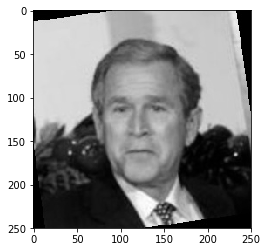

In [19]:
image = data.images[10]

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image,cmap='gray')

In [20]:
# 目标所对应的名字
target_names = data.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [27]:
# 人脸数据
x = data.data
x.shape

(1217, 62500)

In [28]:
y= data.target
y.shape

(1217,)

查看人脸数据结构

从人脸数据中提取进行机器学习的关键数据

分割训练数据和预测数据

In [26]:
from sklearn.model_selection import train_test_split

In [64]:
# 随机打乱顺序,并且进行数据的分割
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [65]:
display(X_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1095, 62500)

(122, 62500)

(1095,)

(122,)

使用PCA进行降维

In [ ]:
# 由于数据太大,训练时间太长.需要降维
# svc = SVC()
# svc.fit(X_train,y_train)

In [62]:
# PCA降维  n_components  从62500的数据选取150个主成分  svd_solver降维方法
# whiten 白化处理,主要是为了使处理后的数据方差都一致
pca = PCA(n_components=300,svd_solver='randomized',whiten=True)

In [63]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [66]:
# 转换
X_train_pca = pca.transform(X_train)

In [67]:
display(X_train_pca.shape,y_train.shape)

(1095, 300)

(1095,)

In [68]:
# 预测数据也转换一下
x_test_pca = pca.transform(x_test)

使用GridSearchCV我们找到了最佳的支持向量机方法

In [69]:
# C=惩罚系数,对误差宽容度,c越高,越不能容忍出误差,容易过拟合

svc = SVC()

# estimator 算法,模型,估计者
# param_grid  参数网格,用到的值,就是我们在SVC用到的参数给他预测
# 选择最优的算法
param_grid = {'C':[0.2,0.5,0.8,1,3,5,7,9],
              'gamma':[0.001,0.002,0.0033,0.006,0.01,0.03,0.05,0.1]}
gcv = GridSearchCV(svc,param_grid=param_grid)

In [56]:
display(X_train_pca.shape,y_train.shape)

(1095, 300)

(1095,)

In [70]:
gcv.fit(X_train_pca,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.2, 0.5, 0.8, 1, 3, 5, 7, 9], 'gamma': [0.001, 0.002, 0.0033, 0.006, 0.01, 0.03, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

进行数据预测

In [71]:
# 选取gcv中最合适的算法
svc = gcv.best_estimator_
svc.fit(X_train_pca,y_train)
y_ = svc.predict(x_test_pca)
y_

array([5, 5, 5, 3, 1, 2, 0, 5, 1, 2, 3, 5, 5, 0, 4, 3, 3, 3, 3, 3, 5, 3,
       4, 3, 1, 4, 5, 0, 3, 3, 3, 3, 4, 3, 1, 3, 1, 3, 1, 2, 1, 5, 1, 3,
       3, 2, 1, 5, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 4, 4, 3, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 4, 3, 5, 5, 3, 3, 1, 0, 1, 4, 3,
       1, 1, 4, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 5, 5, 3, 2,
       3, 3, 3, 3, 1, 1, 0, 1, 1, 2, 3, 1], dtype=int64)

In [72]:
gcv.best_score_

0.7808219178082192

In [73]:
svc.score(x_test_pca,y_test)

0.8442622950819673

定义方法获取预测人名和真实人名 

In [75]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [81]:
target_names[y_[5]]

'Donald Rumsfeld'

In [85]:
def get_names(y_,y_test,target_names,i):
    predict = target_names[y_[i]].rsplit(' ')
    true = target_names[y_test[i]].rsplit(' ')
    str1 = 'predict:%s' % predict
    str2 = 'true:%s' % true
    return str1+ '\n'+ str2

调用方法获取人脸预测的名字，以及人脸的真实名字

In [86]:
# 看预测出来的前20个人
names = [get_names(y_,y_test,target_names,i) for i in range(20)]
names

["predict:['Tony', 'Blair']\ntrue:['Tony', 'Blair']",
 "predict:['Tony', 'Blair']\ntrue:['Tony', 'Blair']",
 "predict:['Tony', 'Blair']\ntrue:['Gerhard', 'Schroeder']",
 "predict:['George', 'W', 'Bush']\ntrue:['George', 'W', 'Bush']",
 "predict:['Colin', 'Powell']\ntrue:['Colin', 'Powell']",
 "predict:['Donald', 'Rumsfeld']\ntrue:['Donald', 'Rumsfeld']",
 "predict:['Ariel', 'Sharon']\ntrue:['Ariel', 'Sharon']",
 "predict:['Tony', 'Blair']\ntrue:['Tony', 'Blair']",
 "predict:['Colin', 'Powell']\ntrue:['Colin', 'Powell']",
 "predict:['Donald', 'Rumsfeld']\ntrue:['Donald', 'Rumsfeld']",
 "predict:['George', 'W', 'Bush']\ntrue:['George', 'W', 'Bush']",
 "predict:['Tony', 'Blair']\ntrue:['Tony', 'Blair']",
 "predict:['Tony', 'Blair']\ntrue:['Tony', 'Blair']",
 "predict:['Ariel', 'Sharon']\ntrue:['Ariel', 'Sharon']",
 "predict:['Gerhard', 'Schroeder']\ntrue:['Gerhard', 'Schroeder']",
 "predict:['George', 'W', 'Bush']\ntrue:['George', 'W', 'Bush']",
 "predict:['George', 'W', 'Bush']\ntrue:['G

定义方法绘制人脸识别结果图形

In [95]:
def show_predict_result(names,row,col,x_test):
    plt.figure(figsize=(row*3,col*5))
    for i,image in enumerate(x_test):
        plt.subplot(row,col,(i+1))
        plt.imshow(image.reshape((250,250)),cmap='gray')
        # 去掉坐标轴
        plt.axis('off')
        # 设置title
        plt.title(names[i])

In [87]:
x_test.shape

(122, 62500)

调用方法，显示数据

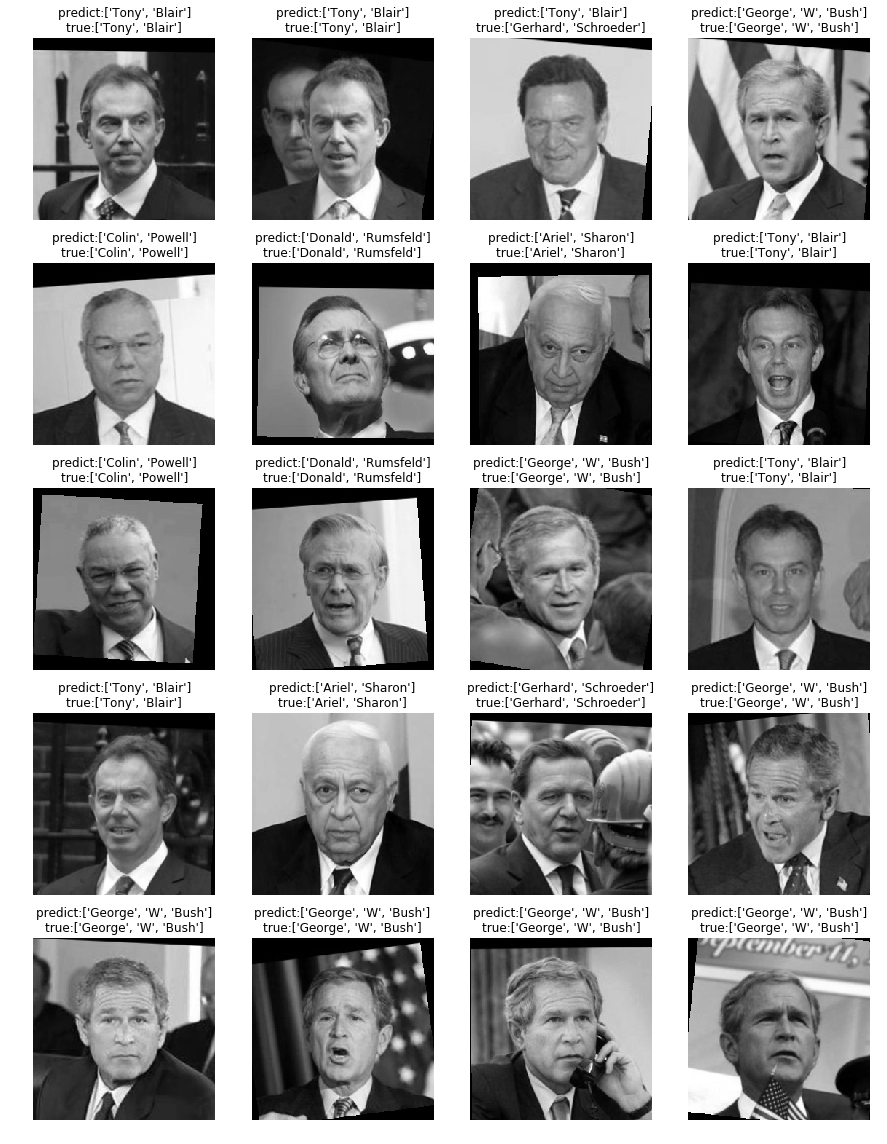

In [96]:
show_predict_result(names,5,4,x_test[:20])

网络上查找图片使用机器学习模型进行预测

In [114]:
bush = plt.imread('../imgs/bush3.jpg')
bush.shape

(433, 650, 3)

In [115]:
# 灰度化处理
gray_bush = bush.mean(axis = 2)
gray_bush.shape

(433, 650)

读取网络数据进行灰度处理gray = [0.299,0.587,0.114]  
如果是jpg图片进行归一化操作

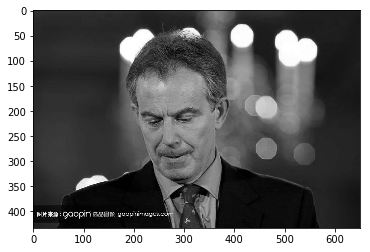

In [116]:
plt.imshow(gray_bush,cmap='gray')

如果图片尺寸不符合要求，那么修改尺寸

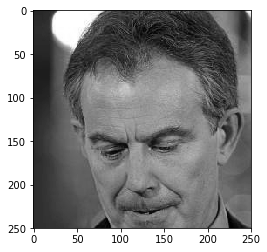

In [117]:
deal_bush = gray_bush[60:310,150:400]
plt.imshow(deal_bush,cmap = 'gray')

In [118]:
deal_bush.shape

(250, 250)

In [119]:
# 降维
bush_pca = pca.transform(deal_bush.reshape((1,-1)))

In [120]:
# 预测
svc.predict(bush_pca)

array([1], dtype=int64)

In [121]:
target_names[1]

'Colin Powell'